In [13]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [21]:
def plot_confusion_matrix_2(cm,
                      target_names,
                      title='EfficientNet for 205 classes - no pass',
                      cmap=None,
                      normalize=True,
                      FONT_SIZE = 10,
                      figsize = (33*2, 25*2)):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions


    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    https://stackoverflow.com/questions/48855290/plotted-confusion-matrix-values-overlapping-each-other-total-classes-90

    """

    #print(cm)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    
    
    plt.figure(figsize=figsize)    # 8, 6
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90, fontsize=FONT_SIZE)
        plt.yticks(tick_marks, target_names, fontsize=FONT_SIZE)

    

    #print(cm)
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=FONT_SIZE,
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=FONT_SIZE,
                     color="white" if cm[i, j] > thresh else "black")


    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

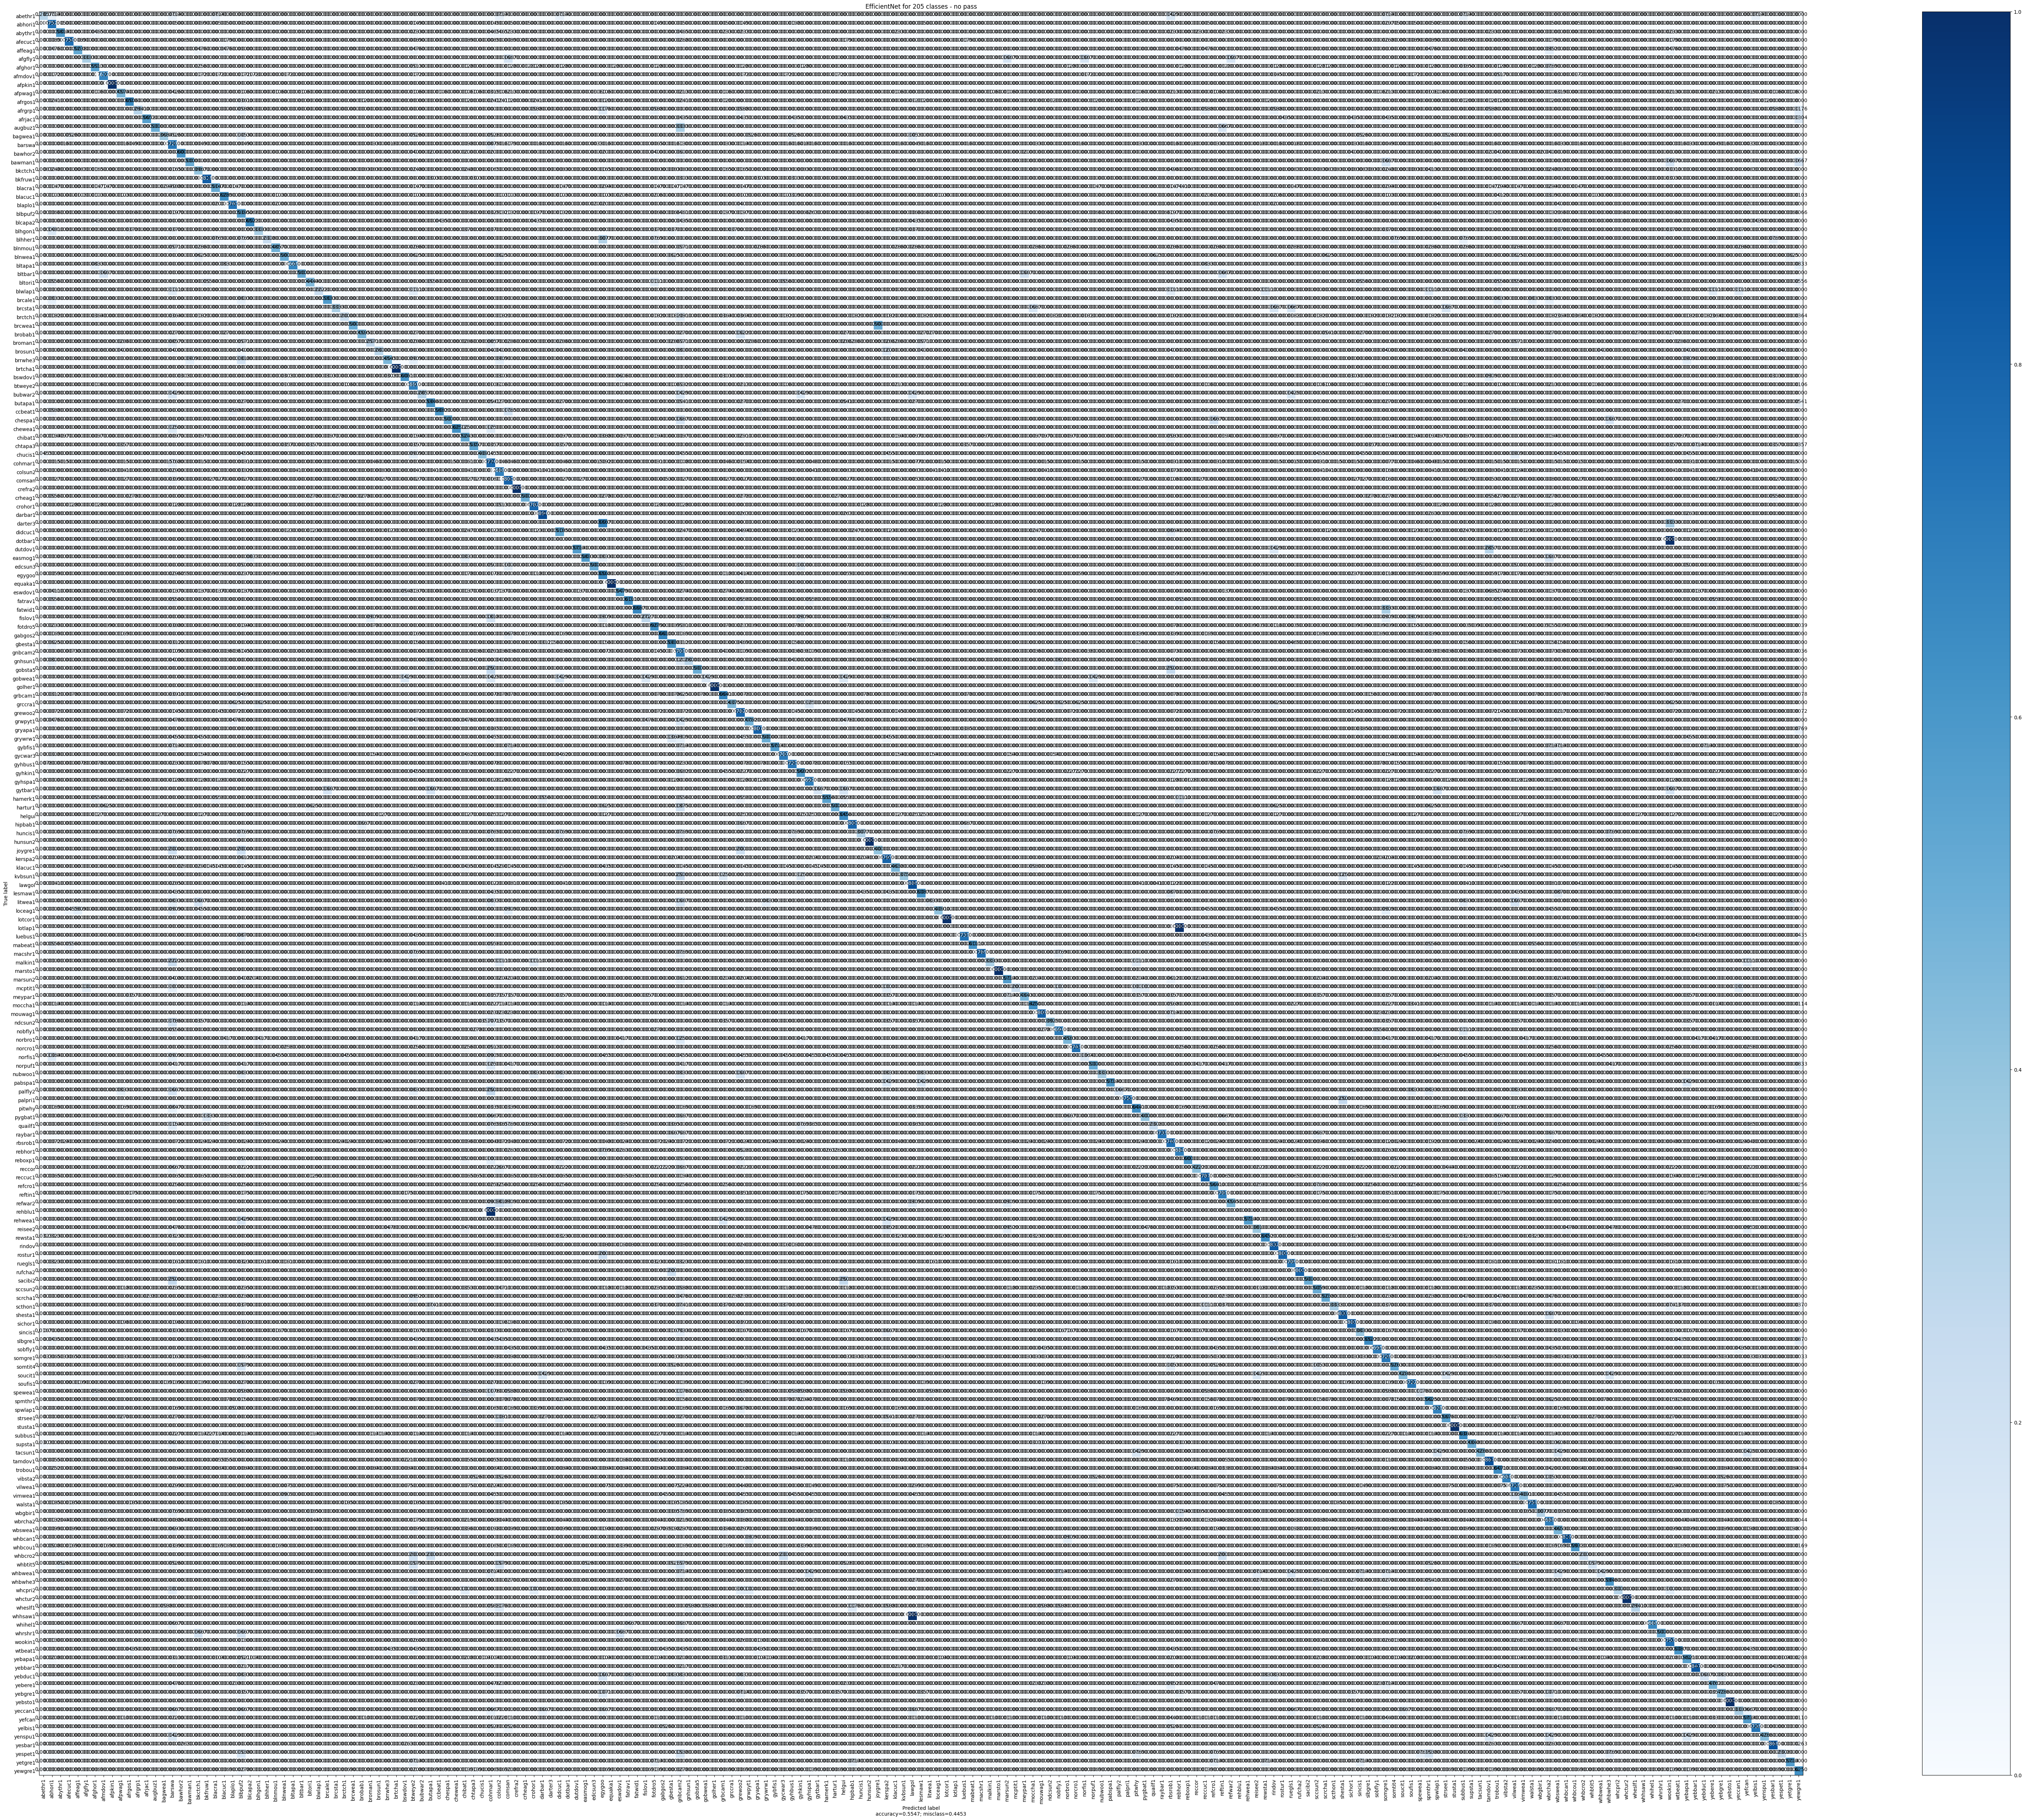

In [22]:
import pandas as pd
import numpy as np
#Generating confusion matrix for a epoch
df_cm = pd.read_csv('epoch20.csv', index_col=0)
cm = df_cm.to_numpy()
target_names = df_cm.index.values
plot_confusion_matrix_2(cm, target_names)